# Analyse des films et séries de Netflix

La base de données peut être trouvées à l'adresse suivante : [https://www.kaggle.com/datasets/ashishgup/netflix-rotten-tomatoes-metacritic-imdb](https://www.kaggle.com/datasets/ashishgup/netflix-rotten-tomatoes-metacritic-imdb)
Cependant la base de données se trouve sur Moodle au format CSV. C'est celle ci que vous devez utilisez.

Vous devez avoir dans un même dossier le notebook jupyter et le fichier CSV.

Voici différentes études à propos de la base de données.

Notre "beau graphique" est le dernier , **Pourcetage normalisée d'apparition du genre A pour un film contenant le genre B**

Bonne lecture !

*Nicolas BERT et Tuncay BILGI*


## Import des données

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import copy as cp
import matplotlib.pyplot as plt

import sys
np.set_printoptions(threshold=sys.maxsize)

# path to dataset
NETFLIX_FILE = './netflix.csv'

df = pd.read_csv(NETFLIX_FILE)

In [3]:
# les premieres lignes du dataset
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


## Répartition Films/Séries

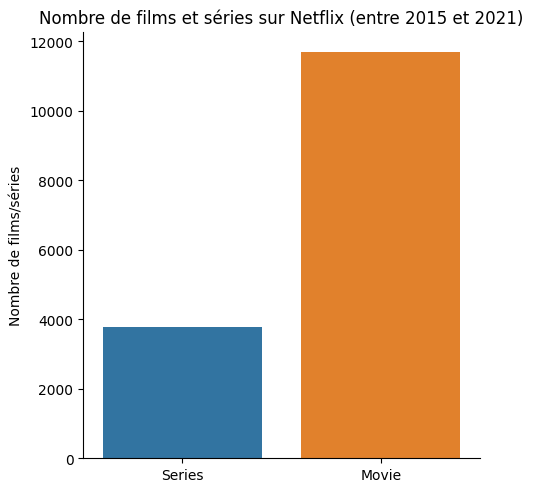

In [4]:
g = sns.catplot(data=df, kind="count", x="Series or Movie")
g.set_axis_labels("", "Nombre de films/séries")
ax = plt.gca()
ax.set_title("Nombre de films et séries sur Netflix (entre 2015 et 2021)")
plt.show()

## Sortie annuelles (sur Netflix)

In [5]:
release_dates = df["Netflix Release Date"].copy()

# slice pour garder année et mois
for i in range(len(release_dates)):
    release_dates[i] = release_dates[i][:-6]

df_release_dates = pd.DataFrame({'Netflix Release Date': np.flip(release_dates.values)})



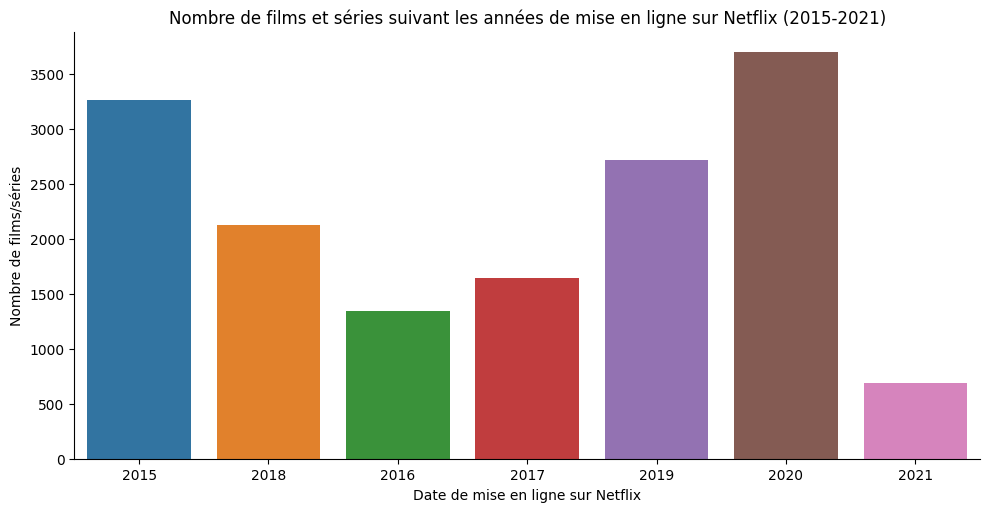

In [6]:
g = sns.catplot(data=df_release_dates, x="Netflix Release Date", kind="count", aspect=2)
g.set_axis_labels('Date de mise en ligne sur Netflix', 'Nombre de films/séries')
ax = plt.gca()
ax.set_title("Nombre de films et séries suivant les années de mise en ligne sur Netflix (2015-2021)")
plt.show()

## Différentes notations suivants les organismes

Les films et séries du dataset comprennent pour certains des notes provenant de différents organismes de notation : "IMDb", "Rotten Tomatoes" et "Metacritic".

In [7]:
# Supprimer les lignes qui ne possèdent pas de genre
df_has_genre = df.dropna(subset=['Genre'])

# Normalisation des scores de notations (0 à 10)
# IMDb Score OK
# Rotten Tomatoes 0 -- 100
# Metacritics 0 -- 100

df_has_genre['Rotten Tomatoes Score'] = df_has_genre['Rotten Tomatoes Score'].apply(lambda x : x/10)
df_has_genre['Metacritic Score'] = df_has_genre['Metacritic Score'].apply(lambda x : x/10)



/tmp/ipykernel_29513/3712035065.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_has_genre['Rotten Tomatoes Score'] = df_has_genre['Rotten Tomatoes Score'].apply(lambda x : x/10)
/tmp/ipykernel_29513/3712035065.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_has_genre['Metacritic Score'] = df_has_genre['Metacritic Score'].apply(lambda x : x/10)


La colonne genre est une chaine de caractères de genres séparés par des virgules, on va alors split cette chaine de caractères et exploser le dataframe pour avoir une ligne par genre pour chaque film.

In [8]:
df_genre = df_has_genre['Genre'].str.split(', ')
df_imdb = pd.DataFrame(data={
  'Genre': df_genre,
  'IMDb Score': df_has_genre['IMDb Score'],
  'Netflix Release Date': df_has_genre['Netflix Release Date']
})

for i in range(len(df_imdb['Netflix Release Date'].values)):
  df_imdb['Netflix Release Date'].values[i] = df_imdb['Netflix Release Date'].values[i][:-3]

df_imdb_ex = df_imdb.explode('Genre')




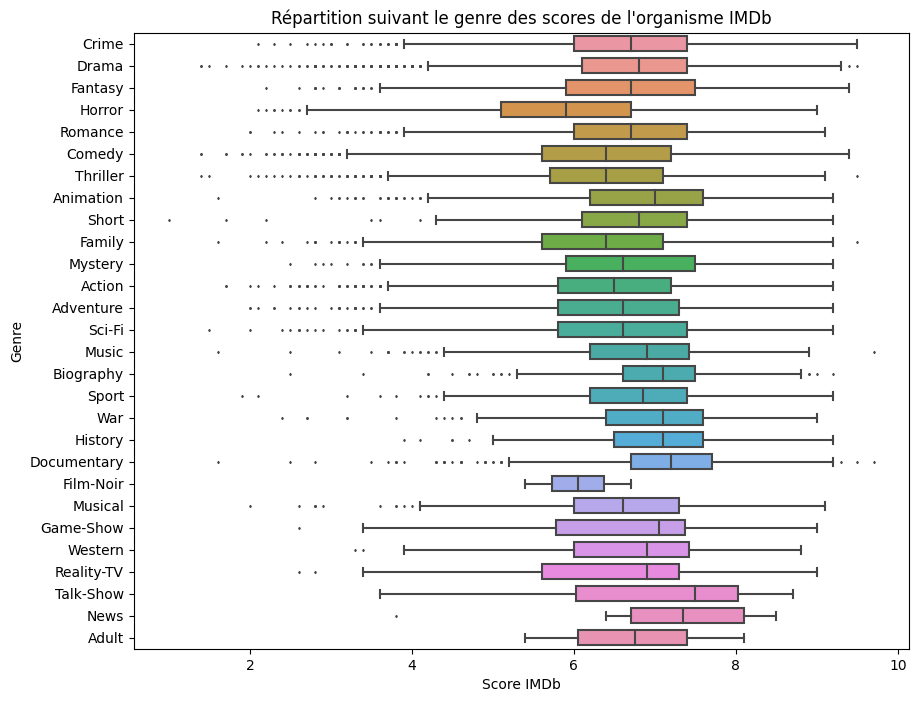

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_imdb_ex, y='Genre', x='IMDb Score', orient="h", ax=ax, fliersize=1, width=.7)
ax.set_title("Répartition suivant le genre des scores de l'organisme IMDb")
ax.set_xlabel('Score IMDb')
plt.show()


#### Rotten Tomatoes

In [10]:
df_genre = df_has_genre['Genre'].str.split(', ')
df_rotten = pd.DataFrame(data={
  'Genre': df_genre,
  'Rotten Tomatoes Score': df_has_genre['Rotten Tomatoes Score']
})
df_rotten_ex = df_rotten.explode('Genre')
df_rotten_ex

,Genre,Rotten Tomatoes Score
0,Crime,9.8
0,Drama,9.8
0,Fantasy,9.8
0,Horror,9.8
0,Romance,9.8
...,...,...
15478,Family,NaN
15479,Animation,NaN
15479,Action,NaN
15479,Comedy,NaN


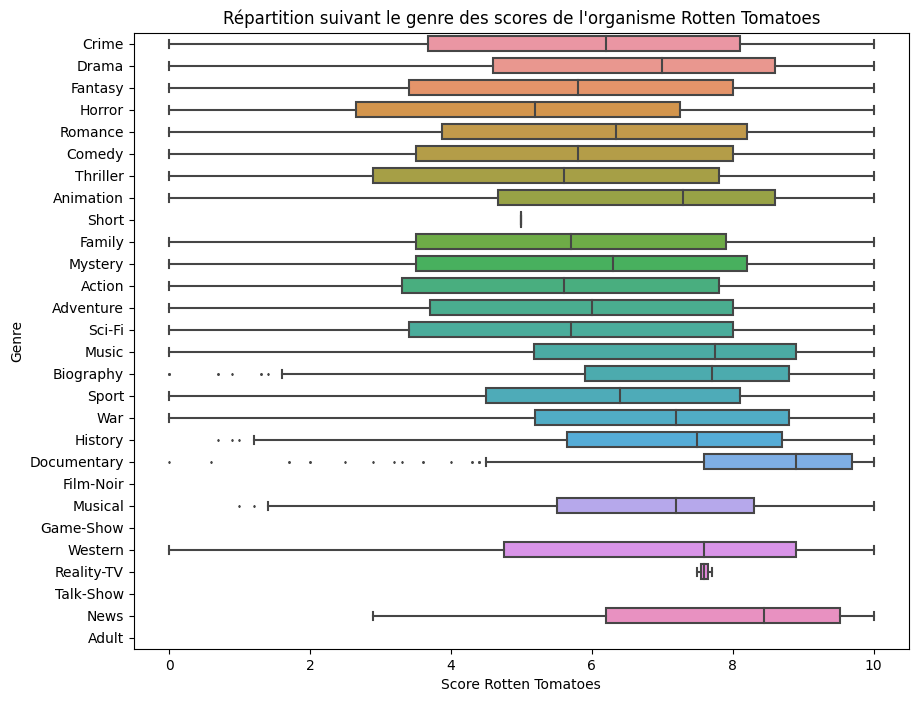

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_rotten_ex, y='Genre', x='Rotten Tomatoes Score', orient="h", ax=ax, fliersize=1, width=.7)
ax.set_title("Répartition suivant le genre des scores de l'organisme Rotten Tomatoes")
ax.set_xlabel('Score Rotten Tomatoes')
plt.show()

#### Metacritics Score

In [12]:
df_genre = df_has_genre['Genre'].str.split(', ')
df_meta = pd.DataFrame(data={
  'Genre': df_genre,
  'Metacritic Score': df_has_genre['Metacritic Score']
})
df_meta_ex = df_meta.explode('Genre')
df_meta_ex

,Genre,Metacritic Score
0,Crime,8.2
0,Drama,8.2
0,Fantasy,8.2
0,Horror,8.2
0,Romance,8.2
...,...,...
15478,Family,NaN
15479,Animation,NaN
15479,Action,NaN
15479,Comedy,NaN


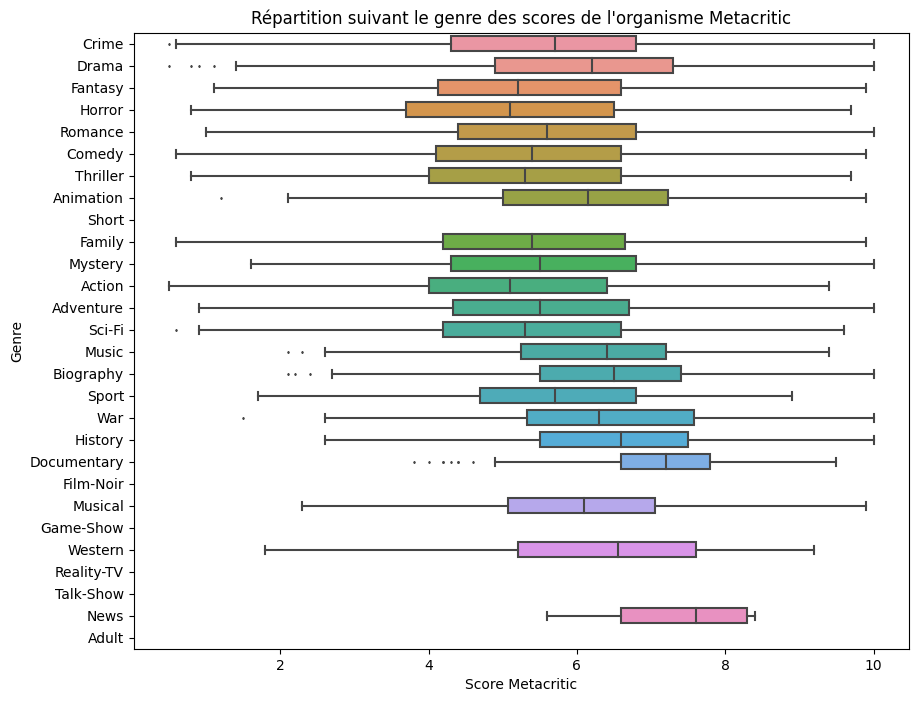

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_meta_ex, y='Genre', x='Metacritic Score', orient="h", ax=ax, fliersize=1, width=.7)
ax.set_title("Répartition suivant le genre des scores de l'organisme Metacritic")
ax.set_xlabel('Score Metacritic')
plt.show()

## Corrélation entre les genres, les années-mois de sorties sur Netflix et le score IMDb

In [14]:
data = df_imdb_ex.pivot_table(index="Genre", columns="Netflix Release Date", values="IMDb Score")
data.head()

Netflix Release Date,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,...,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03
Genre,,,,,,,,,,,,,,,,,,,,,
Action,6.624085,6.445000,6.373333,6.343750,6.689474,6.829167,6.605556,6.243750,6.640741,6.803571,...,6.229268,6.217857,5.734375,6.413514,6.633333,6.218519,6.209877,6.185185,6.292500,6.480000
Adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adventure,6.578156,6.208333,6.406250,6.475000,6.766667,7.167568,6.785714,6.850000,6.490000,7.094737,...,6.688889,6.150000,6.377778,6.460714,6.800000,6.407895,6.075000,6.544000,6.611111,6.540000
Animation,6.820122,6.366667,6.807692,7.066667,7.030000,7.161538,6.883333,7.357143,6.550000,7.028571,...,6.821429,6.764286,6.517647,6.491304,6.923529,6.969697,6.264103,7.234483,6.746667,6.750000
Biography,7.191912,7.750000,6.733333,6.900000,6.725000,7.630000,6.857143,6.400000,7.333333,7.175000,...,6.985714,6.382353,6.637500,6.590000,7.562500,6.600000,7.053333,6.575000,6.630000,6.433333


Ici pour la première case du tableau il faut l'interprêter de la façon suivante : "En moyenne, IMDb a noté à 6.624085 les films comportant le genre 'Action' sortis sur Netflix en avril 2015.

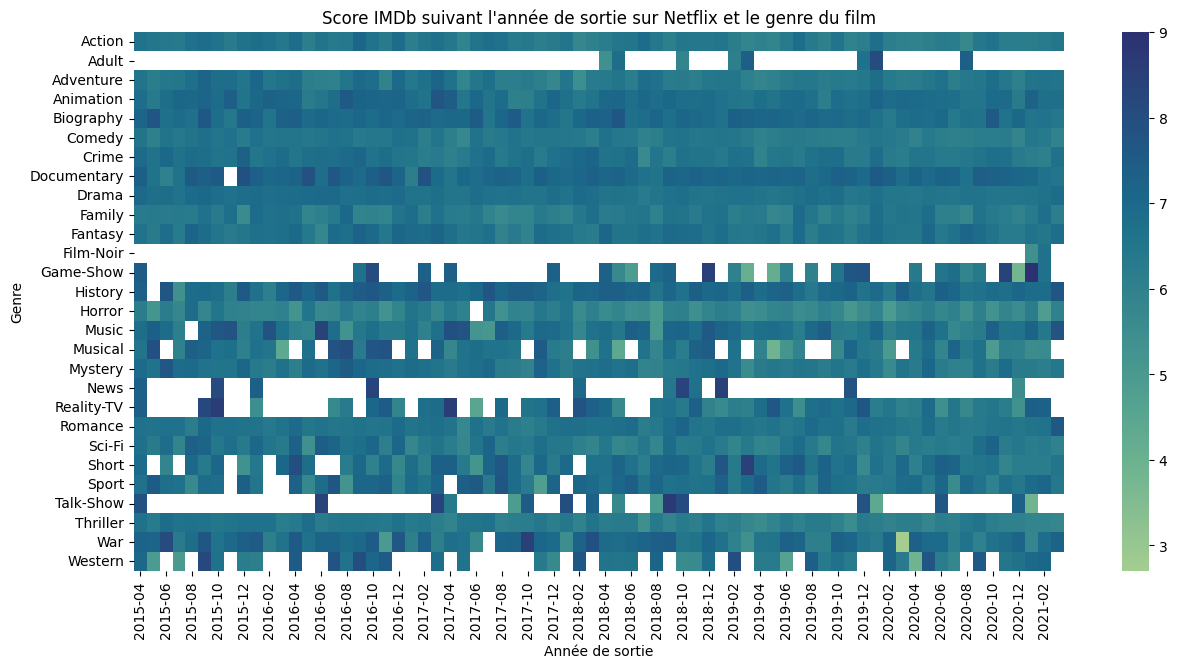

In [15]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(data,yticklabels=True, ax=ax, cmap="crest")
ax.set_title("Score IMDb suivant l'année de sortie sur Netflix et le genre du film")
ax.set_xlabel('Année de sortie')
plt.show()


## Corrélation entre les genres de films

In [16]:
# Liste des genres de chaque film (i.e le premier élément de la liste est une liste qui contient les genres du premier film)
film_genres_list = df_has_genre['Genre'].values

# mise en forme arr(arr)
for i in range(len(film_genres_list)):
  film_genres_list[i]=film_genres_list[i].split(', ')


In [17]:
film_genres_list

array([list(['Crime', 'Drama', 'Fantasy', 'Horror', 'Romance']),
       list(['Comedy']), list(['Drama', 'Thriller']), list(['Drama']),
       list(['Animation', 'Short', 'Drama']), list(['Comedy', 'Romance']),
       list(['Drama']), list(['Crime']), list(['Drama']),
       list(['Comedy']), list(['Comedy', 'Family', 'Fantasy']),
       list(['Crime', 'Drama', 'Fantasy', 'Mystery', 'Thriller']),
       list(['Drama']), list(['Comedy', 'Drama']),
       list(['Short', 'Drama']), list(['Crime', 'Drama', 'Thriller']),
       list(['Action', 'Adventure', 'Fantasy', 'Sci-Fi']),
       list(['Adventure', 'Drama', 'Fantasy', 'Mystery']),
       list(['Music']), list(['Drama', 'Thriller']), list(['Short']),
       list(['Thriller']), list(['Drama']),
       list(['Animation', 'Action', 'Comedy']), list(['Comedy', 'Drama']),
       list(['Crime', 'Drama']), list(['Drama', 'Sci-Fi']),
       list(['Drama', 'Romance']), list(['Comedy']),
       list(['Action', 'Family', 'Sci-Fi', 'Thriller']),
 

In [18]:
# on récupère tous les genres présents
genres_list = set(df_imdb_ex['Genre'].values)
genres_list

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [19]:
# on enlève certains genres qui ne sont pas intéressants ou peu représentés
to_remove = ['Western','Film-Noir','War','Music','Talk-Show','News','Musical','Adult','Sport','Reality-TV', 'History', 'Biography', 'Short', 'Game-Show', 'Documentary']
genres_list.difference_update(to_remove)
print(genres_list)

{'Fantasy', 'Crime', 'Thriller', 'Comedy', 'Drama', 'Adventure', 'Mystery', 'Action', 'Horror', 'Animation', 'Sci-Fi', 'Romance', 'Family'}


In [20]:
# algorithme pour compter les occurrences ou un genre apparait avec un autre
# Exemple de la structure de données voulue: 
# {
#   'drama':{
#     'comedy': 2,  # il y a deux films qui sont tagués drama et comedy
#     'romance': 4,
#     ...
#   },
#   'comedy': {
#     'drama': 9,
#     'romance': 3,
#     ...
#   },
#   ...
# }

# initialisation du dictionnaire de corrélation (on crée la strcture décrite précédemment avec que des zéros)
corr = { g : 0 for g in genres_list }
genres_corr = {g : cp.deepcopy(corr) for g in genres_list}

# comptage
for g in genres_list:
  for f in film_genres_list:
    # print(g, f, g in f)
    if g in f:
      # print("boucle ok")
      for t in f:
        if t in genres_list:
          genres_corr[g][t] += 1
          # print('incremente tag ', t, 'dans genre ', g )
          # print(genres_corr[g])

In [21]:
# Normalisation suivant le genre du film (on divise chaque score par le nombre de film du genre en question) et on multiplie par 100

for g in genres_corr.keys():
  x=genres_corr[g][g] # nombre de films du genre g
  for t in genres_corr[g]:
    genres_corr[g][t] = 100*genres_corr[g][t]/x

In [22]:
# Création dataframe 2D
df_corr_genre = pd.DataFrame(genres_corr).transpose()

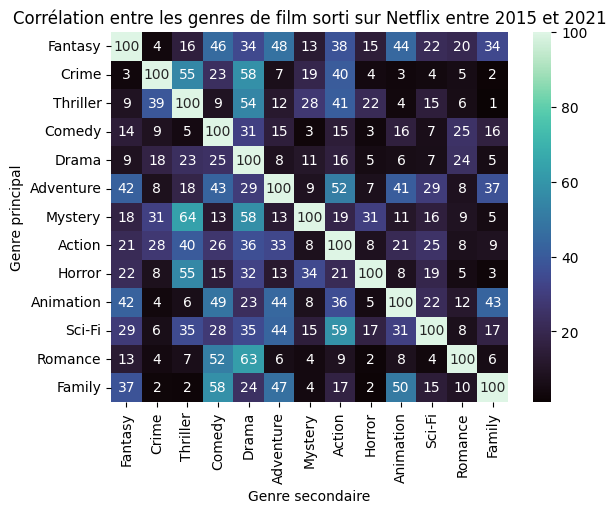

In [24]:
fig, ax = plt.subplots()
sns.heatmap(df_corr_genre,yticklabels=True, xticklabels=True, ax=ax, cmap="mako", annot=True, fmt=".0f") # ou rocket_r / mako / Blues
ax.set_xlabel("Genre secondaire")
ax.set_ylabel("Genre principal")
ax.set_title("Corrélation entre les genres de film sorti sur Netflix entre 2015 et 2021")
plt.show()


Lecture : je choisis en genre principal la **Romance** je peux lire que parmi tous les films de romance, 63% d'entre eux possèdent également le genre **Drama**